In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [6]:
df= pd.read_csv('diabetes.csv')

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#sns.pairplot(df)

In [52]:
#df.describe()

In [48]:
#df.info()

In [46]:
#sns.jointplot(df,x='Glucose',y='BloodPressure',hue='Insulin')

In [68]:
X=df.drop('Outcome',axis=1)

In [70]:
y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [74]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracy =[] # when you fit the model to train data
test_accuracy =[] # when you predict on test data and compare with actual data labels

for i in range(1,9):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy.append(knn.score(X_train, y_train))

    #Compute accuracy on the test set
    y_pred= knn.predict(X_test)
    ac=accuracy_score(y_pred,y_test)
    test_accuracy.append(ac)

    # alternatively we can use the code below

    #it calls predict and then calls accuracy_score.
    #test_accuracy.append(knn.score(X_test, y_test))

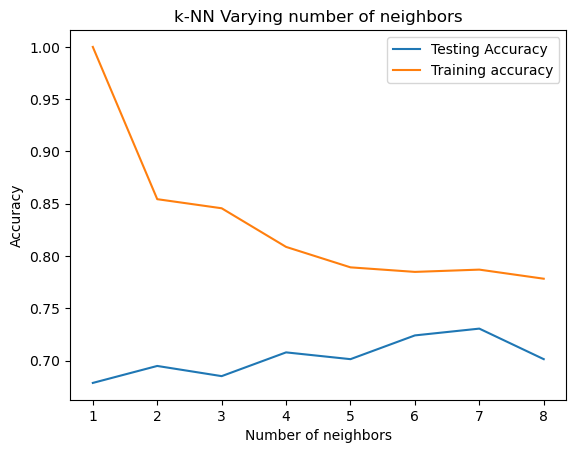

In [77]:
neighbors = np.arange(1,9)

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()